# Estudio de mercado para un café automatizado en Los Ángeles

Los Ángeles es una ciudad conocida por su diversidad culinaria y su vibrante escena de restaurantes. Con la tecnología avanzando rápidamente, surge una propuesta innovadora: un café regentado por robots. Esta idea, aunque prometedora, conlleva un alto costo de implementación. Para atraer a posibles inversionistas, es crucial entender las condiciones actuales del mercado y determinar si el éxito inicial puede mantenerse.

## Preparación de los datos para el análisis.

### Importar librerías.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

### Cargar datos.

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [3]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


### Optimizar datos.

In [4]:
# Contar los valores ausentes en la columna 'chain'
missing_chain_count = rest_data['chain'].isnull().sum()
print(f"Valores ausentes en la columna 'chain': {missing_chain_count}")

Valores ausentes en la columna 'chain': 3


In [5]:
# Eliminar las filas con valores ausentes en la columna 'chain'
rest_data = rest_data.dropna(subset=['chain'])

# Convertir la columna 'chain' a tipo booleano
rest_data['chain'] = rest_data['chain'].astype(bool)

In [6]:
# Verificar y eliminar filas duplicadas
rest_data = rest_data.drop_duplicates()

# Confirmar que no hay valores ausentes ni duplicados
print(rest_data.isnull().sum())
print(rest_data.duplicated().sum())

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64
0


In [7]:
print(rest_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB
None


## Análisis de los datos.

### Proporción de los distintos tipos de establecimiento.

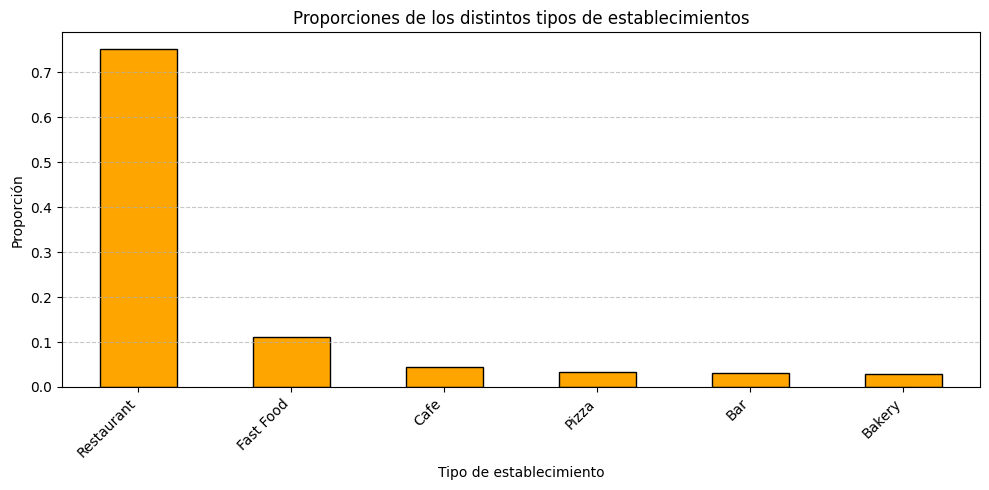

In [8]:
# Contar la frecuencia de cada tipo de establecimiento
type_counts = rest_data['object_type'].value_counts()

# Calcular las proporciones
type_proportions = type_counts / type_counts.sum()

# Trazar un gráfico de barras para mostrar las proporciones
plt.figure(figsize=(10, 5))
type_proportions.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Proporciones de los distintos tipos de establecimientos')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Proporción de los establecimientos que pertenecen a una cadena o no.

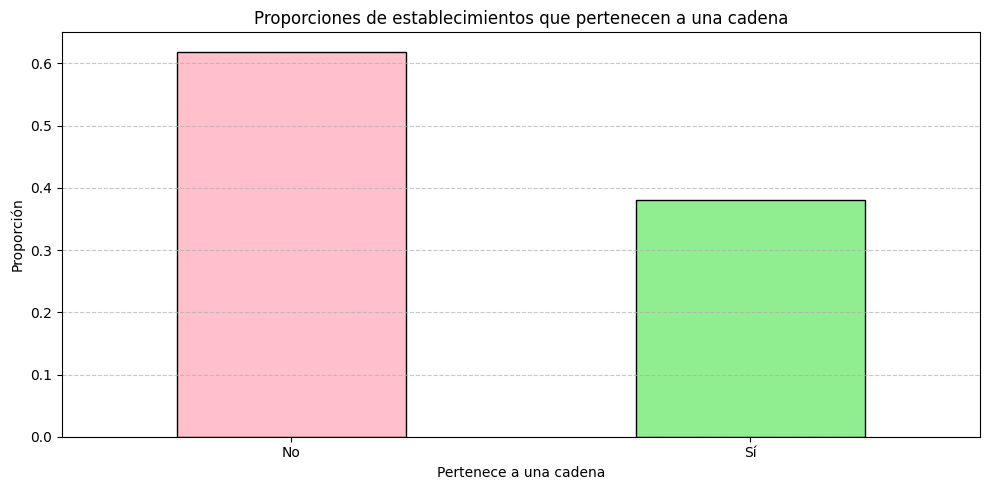

In [9]:
# Contar la frecuencia de establecimientos que pertenecen a una cadena y de los que no
chain_counts = rest_data['chain'].value_counts()

# Calcular las proporciones
chain_proportions = chain_counts / chain_counts.sum()

# Trazar un gráfico de barras para mostrar las proporciones
plt.figure(figsize=(10, 5))
chain_proportions.plot(kind='bar', color=['pink', 'lightgreen'], edgecolor='black')
plt.title('Proporciones de establecimientos que pertenecen a una cadena')
plt.xlabel('Pertenece a una cadena')
plt.ylabel('Proporción')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [17]:
# Filtrar el DataFrame para incluir solo los establecimientos que pertenecen a una cadena
chain_restaurants = rest_data[rest_data['chain']]

# Contar la frecuencia de cada tipo de establecimiento dentro de este subconjunto
chain_type_counts = chain_restaurants['object_type'].value_counts()

# Contar la frecuencia de cada tipo de establecimiento en el conjunto completo de datos
total_type_counts = rest_data['object_type'].value_counts()

# Calcular el porcentaje de establecimientos que son cadenas para cada tipo
chain_percentage = (chain_type_counts / total_type_counts) * 100

print(chain_percentage)

Bakery        100.000000
Bar            26.369863
Cafe           61.149425
Fast Food      56.754221
Pizza          47.962382
Restaurant     31.600717
Name: object_type, dtype: float64


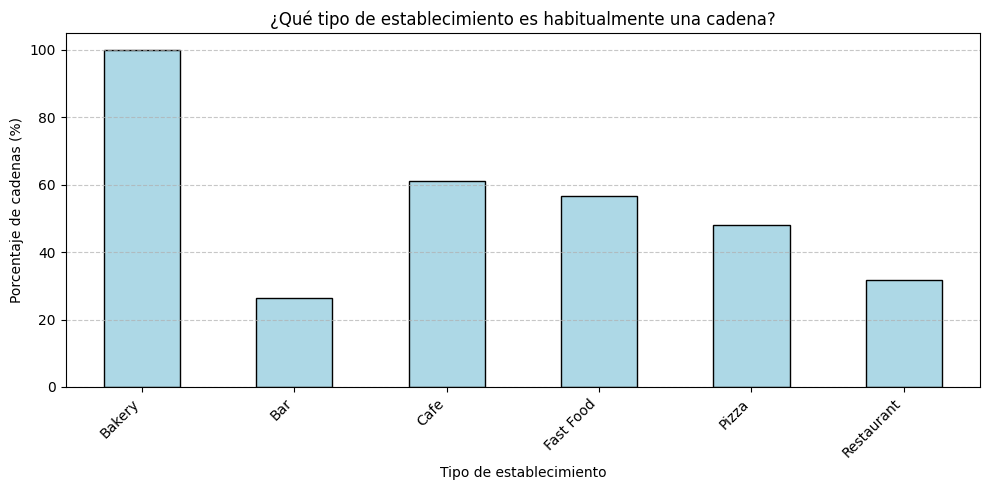

In [16]:
plt.figure(figsize=(10, 5))
chain_percentage.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('¿Qué tipo de establecimiento es habitualmente una cadena?')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Porcentaje de cadenas (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ¿Qué caracteriza a las cadenas?

In [ ]:
# Calcular estadísticas descriptivas del número de asientos para los establecimientos de cadenas
avg_seats_chain = chain_restaurants['number'].mean()
median_seats_chain = chain_restaurants['number'].median()

print(f"Promedio de número de asientos en establecimientos de cadenas: {avg_seats_chain:.2f}")
print(f"Mediana de número de asientos en establecimientos de cadenas: {median_seats_chain}")

In [ ]:
# Filtrar para incluir solo los establecimientos que pertenecen a cadenas y los que no
non_chain_restaurants = rest_data[~rest_data['chain']]

# Calcular estadísticas descriptivas del número de asientos para los establecimientos de cadenas y los no cadenas
avg_seats_non_chain = non_chain_restaurants['number'].mean()
median_seats_non_chain = non_chain_restaurants['number'].median()

print(f"Promedio de número de asientos en establecimientos independientes: {avg_seats_non_chain:.2f}")
print(f"Mediana de número de asientos en establecimientos independientes: {median_seats_non_chain}")

In [ ]:
plt.figure(figsize=(10, 5))

plt.hist(chain_restaurants['number'], bins=30, color='purple', alpha=0.7, label='Cadenas', edgecolor='black')
plt.hist(non_chain_restaurants['number'], bins=30, color='skyblue', alpha=0.7, label='Independientes', edgecolor='black')

plt.title('Comparación de distribución de número de asientos')
plt.xlabel('Número de asientos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Promedio de número de asientos para cada tipo de restaurante.

In [ ]:
# Calcular el promedio de número de asientos por tipo de restaurante
avg_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Identificar el tipo de restaurante con el mayor promedio de asientos
max_avg_seats_type = avg_seats_by_type.idxmax()
max_avg_seats_value = avg_seats_by_type.max()

print(f"Tipo de restaurante con el mayor promedio de asientos: {max_avg_seats_type}")
print(f"Promedio de número de asientos: {max_avg_seats_value:.2f}")

In [ ]:
# Visualizar el promedio de número de asientos por tipo de restaurante en un gráfico de barras
plt.figure(figsize=(10, 5))
avg_seats_by_type.plot(kind='bar', color='red', alpha=0.6, edgecolor='black')
plt.title('Promedio de número de asientos por tipo de establecimiento')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Promedio de número de asientos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Datos de los nombres de las calles.

In [ ]:
# Definir una función para extraer el nombre de la calle
def extract_street_name(address):
    # Dividir la dirección por espacios y tomar todas las partes excepto la primera (número de la calle)
    parts = address.split(' ', 1)
    if len(parts) > 1:
        return parts[1].strip()  # Devuelve todo después del primer espacio (nombre de la calle)
    else:
        return None
    
# Aplicar la función a la columna 'address' para extraer los nombres de las calles
rest_data['street_name'] = rest_data['address'].apply(extract_street_name)

print(rest_data['street_name'].head(10))

### Las diez mejores calles por número de establecimientos.

In [ ]:
# Contar el número de establecimientos por calle
top_streets = rest_data['street_name'].value_counts().nlargest(10)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(10, 5))
top_streets.plot(kind='bar', color='green', alpha=0.5, edgecolor='black')
plt.title('Las 10 mejores calles por número de establecimientos')
plt.xlabel('Nombre de la calle')
plt.ylabel('Número de restaurantes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Calles con solo un establecimiento.

In [ ]:
# Contar el número de establecimientos por calle
street_counts = rest_data['street_name'].value_counts()

# Encontrar el número de calles con exactamente un establecimiento
streets_with_one_restaurant = street_counts[street_counts == 1]

# Contar el número de calles con exactamente un establecimiento
num_streets_with_one_restaurant = streets_with_one_restaurant.size

print(streets_with_one_restaurant.head())
print(f"\nNúmero de calles que solo tienen un establecimiento: {num_streets_with_one_restaurant}")

### Distribución de calles con muchos restaurantes.

In [ ]:
# Utilizar la variable top_streets previamente calculada
top_streets = rest_data['street_name'].value_counts().nlargest(10).index

# Filtrar los datos para las calles seleccionadas
selected_streets_data = rest_data[rest_data['street_name'].isin(top_streets)]

# Crear un gráfico de caja para mostrar la distribución del número de asientos
plt.figure(figsize=(12, 8))
plt.boxplot([selected_streets_data[selected_streets_data['street_name'] == street]['number'] for street in top_streets],
            labels=top_streets)
plt.title('Distribución del número de asientos en calles con numerosos establecimientos')
plt.xlabel('Calle')
plt.ylabel('Número de asientos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusiones. 

El proyecto del café robotizado en Los Ángeles tiene un gran potencial para innovar en el mercado de restaurantes. Al iniciar como un establecimiento independiente con un número moderado de asientos y luego considerar una expansión a una cadena, aprovechar las tendencias actuales del mercado y maximizar las oportunidades de éxito. La clave estará en ofrecer una experiencia única y diferenciada que combine tecnología avanzada con un excelente servicio al cliente.

Presentación: https://drive.google.com/file/d/1tImbHN6zQr2Wi9p8XGxPs_rxsfTzn-_q/view?usp=sharing